In [3]:
import osmnx as ox

In [4]:
import matplotlib.pyplot as plt

In [15]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

In [6]:
area =ox.geocode_to_gdf("Northeastern University,Boston,US")

C:\Users\HP\anaconda3\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [16]:
ox.projection.project_gdf(area)
#ax = area.plot()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((327522.066 4689313.097, 327569.187 4...",42.34326,42.334657,-71.083564,-71.093662,177985464,way,301210399,42.33903,-71.087913,"Northeastern University, 360, Huntington Avenu...",amenity,university,0.902915


In [17]:
# Defining the map boundaries 
north, east, south, west =42.34326, -71.083564,42.334657, -71.093662

In [18]:
area1= ox.graph_from_bbox(north, south, east, west, network_type = 'drive')

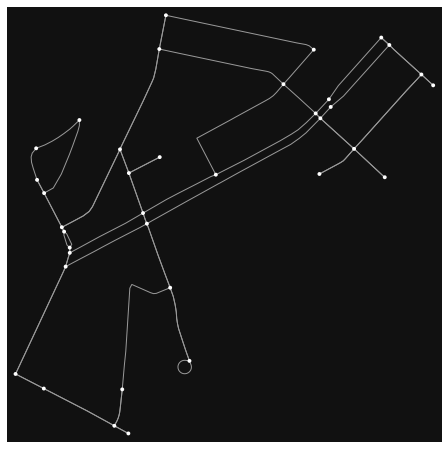

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [20]:
ox.plot_graph(area1)

C:\Users\HP\anaconda3\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


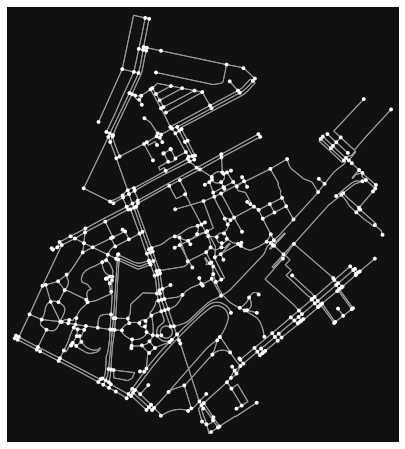

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [21]:
Map_data=ox.graph_from_place("Northeastern University,Boston,US",network_type='walk')
foo=ox.plot_graph(Map_data)
foo

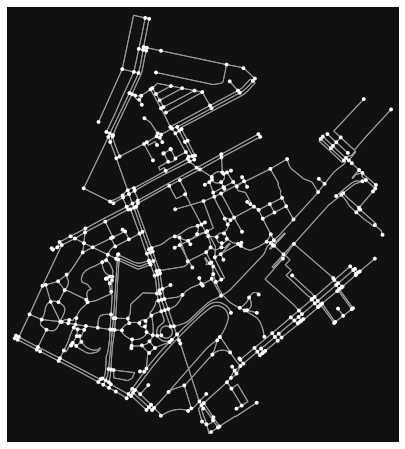

In [22]:
map_data2=ox.bearing.add_edge_bearings(Map_data, precision=1)
foo2=ox.plot_graph(map_data2)

C:\Users\HP\anaconda3\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


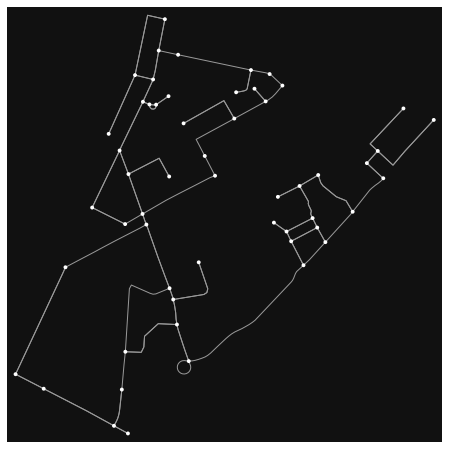

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [23]:
map_data_3 = ox.graph_from_place("Northeastern University,Boston,US", network_type="drive_service")
foo3=ox.plot_graph(map_data_3)
foo3

In [24]:
nodes, edges = ox.graph_to_gdfs(Map_data)
nodes.head()

,y,x,highway,street_count,geometry
osmid,,,,,
61342618,42.342027,-71.087331,traffic_signals,4,POINT (-71.08733 42.34203)
61343519,42.338320,-71.084693,NaN,3,POINT (-71.08469 42.33832)
61343528,42.336966,-71.093662,traffic_signals,4,POINT (-71.09366 42.33697)
61344272,42.335927,-71.090996,NaN,3,POINT (-71.09100 42.33593)
61344302,42.338473,-71.090008,NaN,3,POINT (-71.09001 42.33847)


In [25]:
nodes.plot(ax=ax, facecolor='black')

NameError: name 'ax' is not defined

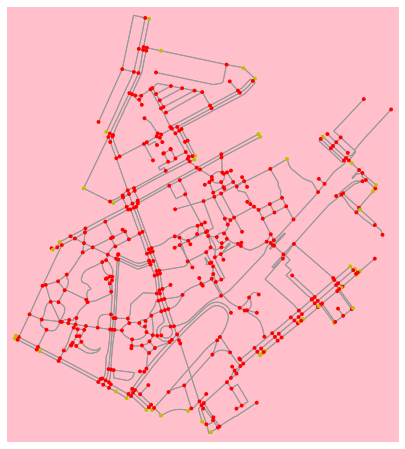

In [26]:
# turn off strict mode and see what nodes we'd remove, in yellow
nc = ["r" if ox.simplification._is_endpoint(Map_data, node) else "y" for node in Map_data.nodes()]
fig, ax = ox.plot_graph(Map_data, node_color=nc,bgcolor='pink')

In [27]:
# simplify the network
#Map_data = ox.simplify_graph(Map_data)
#fig, ax = ox.plot_graph(Map_data, node_color="r")

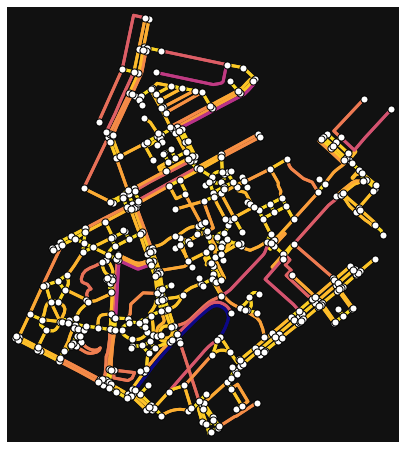

In [28]:
# show the simplified network with edges colored by length
ec = ox.plot.get_edge_colors_by_attr(Map_data, attr="length", cmap="plasma_r")
fig, ax = ox.plot_graph(
    Map_data, node_color="w", node_edgecolor="k", node_size=50, edge_color=ec, edge_linewidth=3
)

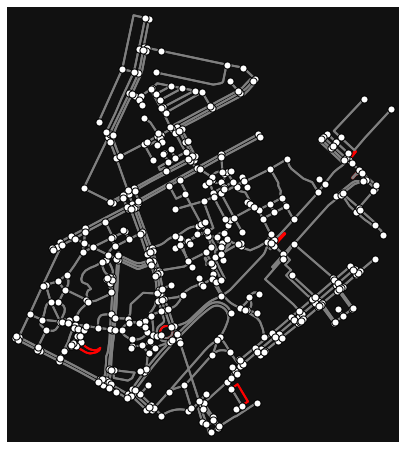

In [29]:
# highlight all parallel (multiple) edges
ec = ["gray" if k == 0 or u == v else "r" for u, v, k in Map_data.edges(keys=True)]
fig, ax = ox.plot_graph(
    Map_data, node_color="w", node_edgecolor="k", node_size=50, edge_color=ec, edge_linewidth=2
)

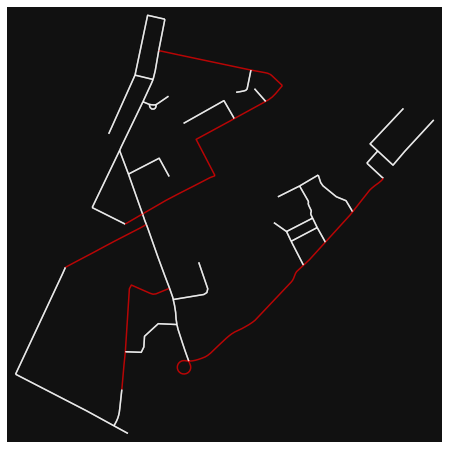

In [30]:
# highlight all one-way edges in the mission district network from earlier
ec = ["r" if data["oneway"] else "w" for u, v, key, data in map_data_3.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(map_data_3, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.7)

In [31]:
node_id = list(Map_data.nodes)[0]
Map_data.nodes[node_id]['x'] #lon
Map_data.nodes[node_id]['y'] #lat

42.3420274

In [32]:
node_id

61342618

In [33]:
h=Map_data.nodes

In [34]:
Map_data.nodes[1185732852]

{'y': 42.3387387, 'x': -71.0882123, 'street_count': 3}

In [36]:
for _, edge in h:
    c = edge['geometry'].centroid
    text = edge['name']
    ax.annotate(text, [c.x, c.y], c='w')

TypeError: cannot unpack non-iterable int object

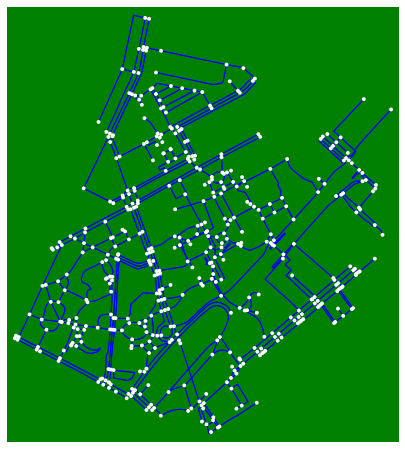

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [37]:
ox.plot.plot_graph(Map_data,bgcolor='g',edge_color='b')

In [38]:
edges.iloc[:, :20].head()

osmid  oneway lanes                  name  \
u        v          key                                                  
61342618 8752743116 0      8643729   False     1  Saint Stephen Street   
         61355941   0      8642650   False     1   Gainsborough Street   
61343519 7755051412 0      8645194   False     1      Davenport Street   
         7755051413 0    301736990   False     2       Columbus Avenue   
61343528 5674226297 0      8644213   False     2         Parker Street   

                             highway maxspeed width  length  bearing  \
u        v          key                                                
61342618 8752743116 0    residential   25 mph  15.2   6.832    220.2   
         61355941   0    residential   25 mph  15.2  33.617    312.0   
61343519 7755051412 0    residential   25 mph  10.4  10.341    142.7   
         7755051413 0        primary   25 mph  24.4   4.699    229.2   
61343528 5674226297 0       tertiary      NaN  15.9   6.420     25.1   

                                                                  geometry  \
u        v          key                                                      
61342618 8752743116 0    LINESTRING (-71.08733 42.34203, -71.08738 42.3...   
         61355941   0    LINESTRING (-71.08733 42.34203, -71.08759 42.3...   
61343519 7755051412 0    LINESTRING (-71.08469 42.33832, -71.08462 42.3...   
         7755051413 0    LINESTRING (-71.08469 42.33832, -71.08474 42.3...   
61343528 5674226297 0    LINESTRING (-71.09366 42.33697, -71.09363 42.3...   

                           ref access service bridge tunnel  
u        v          key                                      
61342618 8752743116 0      NaN    NaN     NaN    NaN    NaN  
         61355941   0      NaN    NaN     NaN    NaN    NaN  
61343519 7755051412 0      NaN    NaN     NaN    NaN    NaN  
         7755051413 0    MA 28    NaN     NaN    NaN    NaN  
61343528 5674226297 0      NaN    NaN     NaN    NaN    NaN

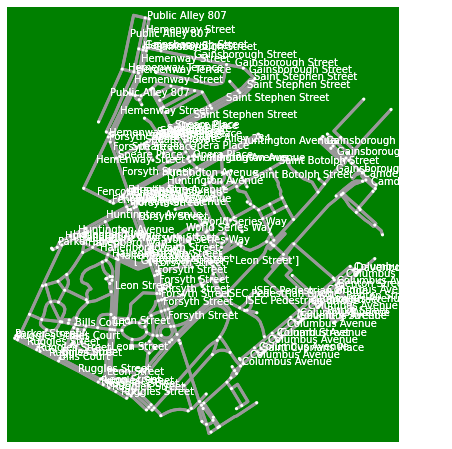

In [39]:
import matplotlib.pyplot as plt
import osmnx as ox
ox.config(use_cache=True, log_console=True)

fig, ax = ox.plot_graph(Map_data, bgcolor='g', edge_linewidth=3, node_size=10,
                        show=False, close=False)
for _, edge in ox.graph_to_gdfs(Map_data, nodes=False).fillna('').iterrows():
    c = edge['geometry'].centroid
    text = edge['name']
    ax.annotate(text, (c.x, c.y), c='w')
plt.show()

<AxesSubplot:>

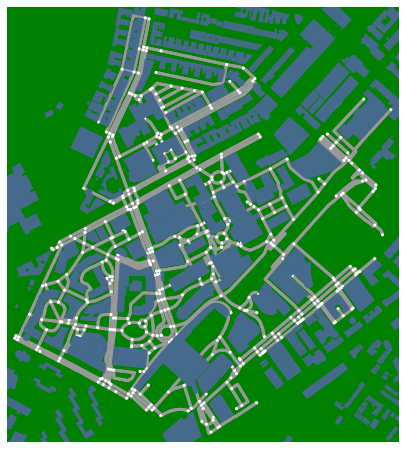

In [40]:
tags = {'amenity': ['Parking'],
       'building':True}
gdf = ox.geometries.geometries_from_bbox(north, south, east, west, tags)
fig, ax = ox.plot_graph(Map_data, bgcolor='g', edge_linewidth=3, node_size=10,
                        show=False, close=False)
gdf.plot(color="#466A8C",ax=ax) #(109, 59)


#fp = ox.geometries_from_place("Northeastern University,Boston,US", tags={'building':True})
#fig, ax = ox.plot_footprints(fp)

In [41]:
edges = ox.graph_to_gdfs(Map_data, nodes=False, edges=True)
edges_series = edges['length'] #gives you a pandas series with edge lengths
edges[['osmid','length']] #gives you a pandas dataframe with osmids of edges and their corresponding lengths

osmid  length
u          v          key                                
61342618   8752743116 0                   8643729   6.832
           61355941   0                   8642650  33.617
61343519   7755051412 0                   8645194  10.341
           7755051413 0                 301736990   4.699
61343528   5674226297 0                   8644213   6.420
...                                           ...     ...
9688845528 6340455732 0                  42825653  51.105
9875074584 61354357   0     [88965608, 697223500]  19.172
           1023691704 0                  88965608  49.363
                      1     [88090810, 835966557]   9.617
           7802718831 0    [835966556, 835966557]  39.295

[1380 rows x 2 columns]

In [42]:
nodes = ox.graph_to_gdfs(Map_data, nodes=True, edges=False)
nodes_series = nodes['name'] #gives you a pandas series with edge lengths
nodes[['osmid','length']] #gives you a pandas dataframe with osmids of edges and their corresponding lengths

KeyError: 'name'

In [ ]:
gh = ox.plot.get_edge_colors_by_attr(Map_data, attr='length')
ox.plot_graph(Map_data, edge_color=gh)

In [43]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(Map_data)
gdf_nodes.head()

,y,x,highway,street_count,geometry
osmid,,,,,
61342618,42.342027,-71.087331,traffic_signals,4,POINT (-71.08733 42.34203)
61343519,42.338320,-71.084693,NaN,3,POINT (-71.08469 42.33832)
61343528,42.336966,-71.093662,traffic_signals,4,POINT (-71.09366 42.33697)
61344272,42.335927,-71.090996,NaN,3,POINT (-71.09100 42.33593)
61344302,42.338473,-71.090008,NaN,3,POINT (-71.09001 42.33847)


In [44]:
G2 = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=Map_data.graph)

In [47]:
tags = {"leisure": "park", "highway": "bus_stop"}
gdf = ox.geometries_from_place("Northeastern University,Boston, US", tags)
gdf.shape

C:\Users\HP\anaconda3\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


(13, 55)

In [206]:
import networkx as nx
import osmnx as ox
from IPython.display import IFrame

# download the street network for Piedmont, CA
G = ox.graph_from_place("Northeastern University,Boston,US", network_type="walk")
# plot the street network with folium
m1 = ox.plot_graph_folium(G, popup_attribute="name", weight=2, color="#8b0000")
# save as html file then display map as an iframe
filepath = "graph.html"
m1.save(filepath)
IFrame(filepath, width=600, height=500)

C:\Users\HP\anaconda3\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [10]:
# plot the route with folium on top of the previously created graph_map
m3 = ox.plot_route_folium(G, route, route_map=m1, popup_attribute="length", weight=7)
filepath = "route_graph.html"
m3.save(filepath)
IFrame(filepath, width=600, height=500)

NameError: name 'G' is not defined